In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("NCRB_CII_2023_Table_13A.2_0.csv")

print(df.shape)
print(df.columns)
print(df.info())
print(df.head())
print(df.describe(include='all'))
print(df.isnull().sum())

(22, 6)
Index(['Sl. No.', 'Crime Head', 'Category',
       'Cases of Crimes Committed against - Foreign Tourists (Col.3)',
       'Cases of Crimes Committed against - Other Foreigners (Col.4)',
       'Cases of Crimes Committed against - Total Foreigners (Col.3+Col.4) (Col.5)'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 6 columns):
 #   Column                                                                      Non-Null Count  Dtype 
---  ------                                                                      --------------  ----- 
 0   Sl. No.                                                                     22 non-null     object
 1   Crime Head                                                                  22 non-null     object
 2   Category                                                                    22 non-null     object
 3   Cases of Crimes Committed against - Foreign Tourists (Col.3)           

In [2]:
df.duplicated().sum()
for col in df.columns:
    print(col, df[col].nunique())
df = df.drop_duplicates()
missing_percent = (df.isnull().sum() / len(df)) * 100
print(missing_percent)
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace(',', '', regex=False)
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

Sl. No. 22
Crime Head 22
Category 5
Cases of Crimes Committed against - Foreign Tourists (Col.3) 15
Cases of Crimes Committed against - Other Foreigners (Col.4) 14
Cases of Crimes Committed against - Total Foreigners (Col.3+Col.4) (Col.5) 17
Sl. No.                                                                       0.0
Crime Head                                                                    0.0
Category                                                                      0.0
Cases of Crimes Committed against - Foreign Tourists (Col.3)                  0.0
Cases of Crimes Committed against - Other Foreigners (Col.4)                  0.0
Cases of Crimes Committed against - Total Foreigners (Col.3+Col.4) (Col.5)    0.0
dtype: float64


C:\Users\prath\AppData\Local\Temp\ipykernel_26944\1670060719.py:15: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


In [3]:
df.describe()

,Cases of Crimes Committed against - Foreign Tourists (Col.3),Cases of Crimes Committed against - Other Foreigners (Col.4),Cases of Crimes Committed against - Total Foreigners (Col.3+Col.4) (Col.5)
count,22.000000,22.000000,22.000000
mean,17.045455,15.409091,32.454545
std,34.240713,29.196639,63.019821
min,0.000000,0.000000,0.000000
25%,1.250000,1.000000,4.750000
50%,6.000000,7.500000,13.000000
75%,11.250000,12.750000,22.750000
max,125.000000,113.000000,238.000000


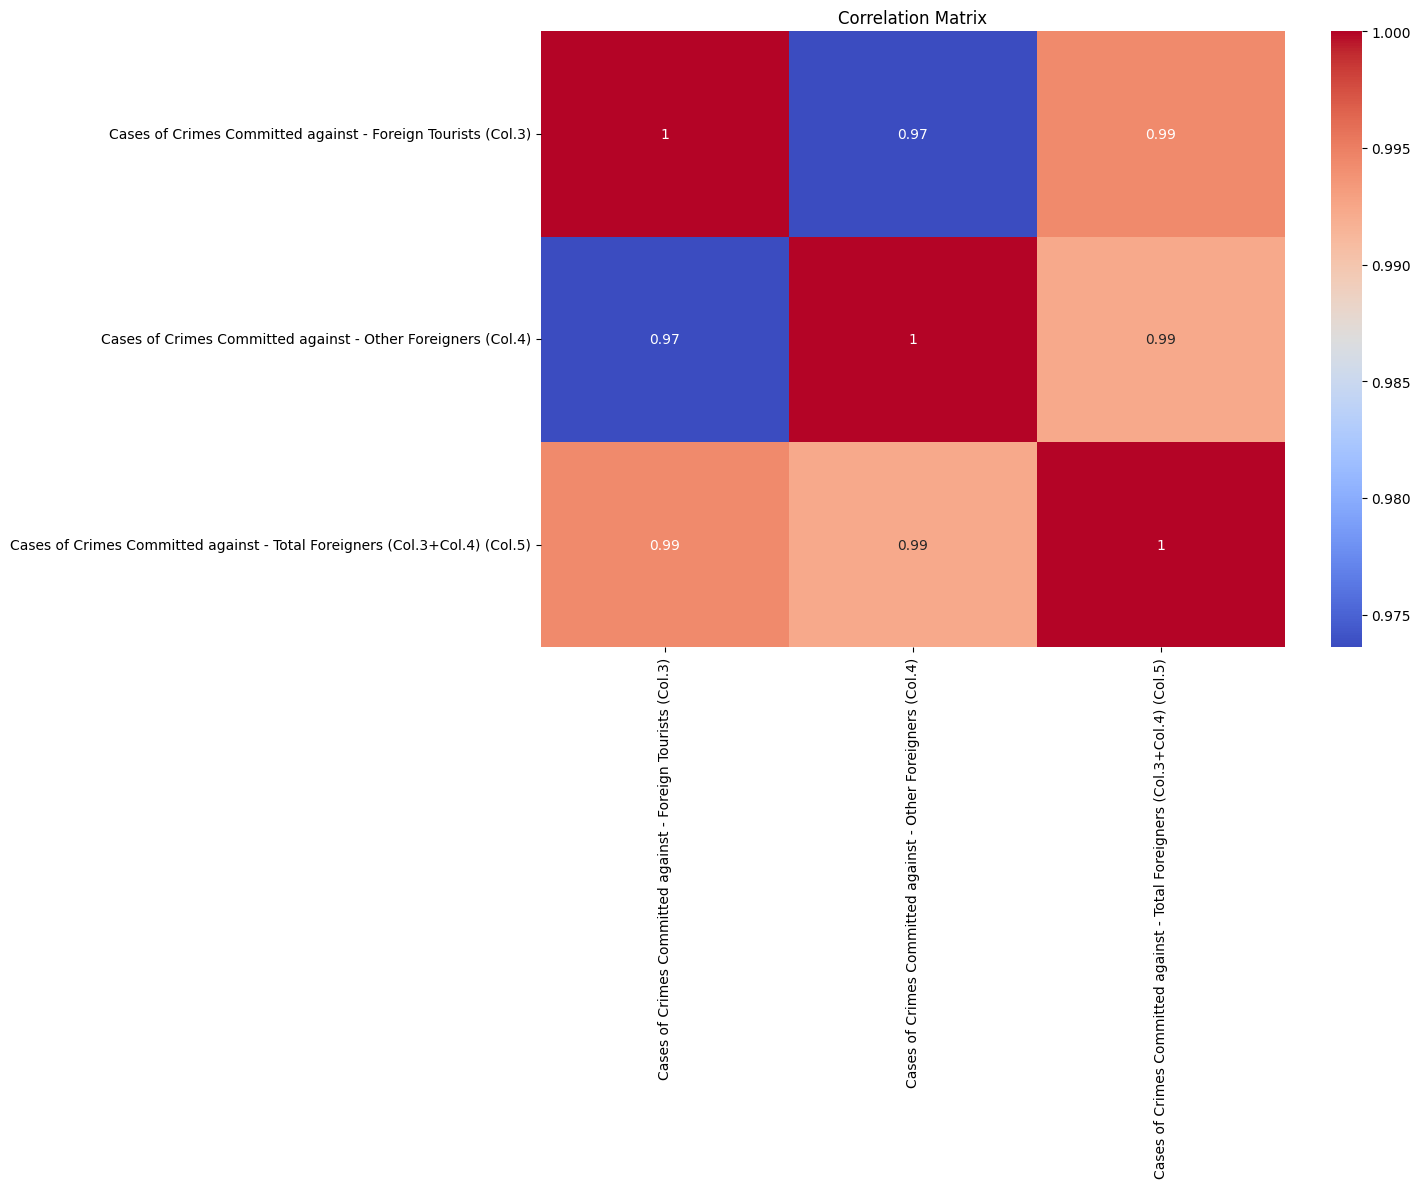

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.select_dtypes(include=np.number).corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

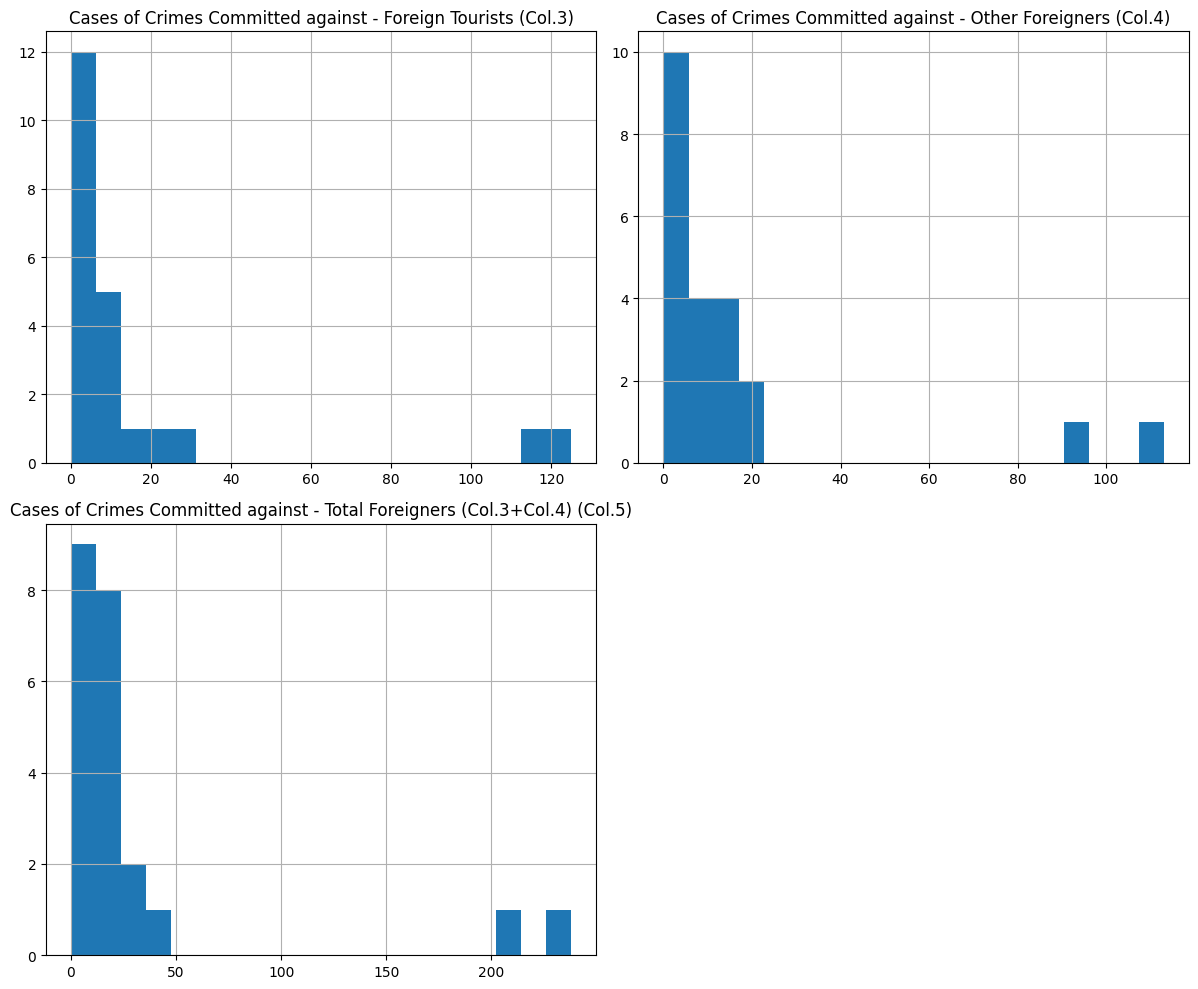

In [5]:
df[numeric_cols].hist(figsize=(12,10), bins=20)
plt.tight_layout()
plt.show()

In [6]:
if "State/UT" in df.columns:
    state_crime = df.groupby("State/UT")[numeric_cols].sum()
    print(state_crime.sort_values(by=numeric_cols[0], ascending=False))

In [9]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)
numeric_data = df.select_dtypes(include=np.number)

selector.fit(numeric_data)
low_variance_cols = numeric_data.columns[~selector.get_support()]
df = df.drop(columns=low_variance_cols)

print("Low variance removed:", list(low_variance_cols))
df.head()

Low variance removed: []


,Sl. No.,Crime Head,Category,Cases of Crimes Committed against - Foreign Tourists (Col.3),Cases of Crimes Committed against - Other Foreigners (Col.4),Cases of Crimes Committed against - Total Foreigners (Col.3+Col.4) (Col.5)
0,1,Murder,IPC,4,9,13
1,2,Culpable Homicide not amounting to Murder,IPC,0,0,0
2,3,Attempt to Commit Murder/Culpable Homicide,IPC,2,2,4
3,4,Simple Hurt,IPC,4,8,12
4,5,Grievous Hurt,IPC,1,1,2


In [10]:
target = "Cases of Crimes Committed against - Total Foreigners (Col.3+Col.4) (Col.5)"

corr_with_target = df.corr()[target].abs().sort_values(ascending=False)
print(corr_with_target)

ValueError: could not convert string to float: 'Total IPC'

In [11]:
print(df.dtypes)

Sl. No.                                                                       object
Crime Head                                                                    object
Category                                                                      object
Cases of Crimes Committed against - Foreign Tourists (Col.3)                   int64
Cases of Crimes Committed against - Other Foreigners (Col.4)                   int64
Cases of Crimes Committed against - Total Foreigners (Col.3+Col.4) (Col.5)     int64
dtype: object


In [12]:
for col in df.columns:
    df[col] = df[col].astype(str).str.replace(',', '', regex=False)

In [13]:
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

C:\Users\prath\AppData\Local\Temp\ipykernel_26944\2907331251.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


In [14]:
df = df[~df.iloc[:,0].str.contains("Total", case=False, na=False)]

In [15]:
df.head()


,Sl. No.,Crime Head,Category,Cases of Crimes Committed against - Foreign Tourists (Col.3),Cases of Crimes Committed against - Other Foreigners (Col.4),Cases of Crimes Committed against - Total Foreigners (Col.3+Col.4) (Col.5)
0,1,Murder,IPC,4,9,13
1,2,Culpable Homicide not amounting to Murder,IPC,0,0,0
2,3,Attempt to Commit Murder/Culpable Homicide,IPC,2,2,4
3,4,Simple Hurt,IPC,4,8,12
4,5,Grievous Hurt,IPC,1,1,2


In [16]:
df = df[df.iloc[:,0] != "Total IPC"]

In [17]:
print(df.head())

  Sl. No.                                  Crime Head Category  \
0       1                                      Murder      IPC   
1       2   Culpable Homicide not amounting to Murder      IPC   
2       3  Attempt to Commit Murder/Culpable Homicide      IPC   
3       4                                 Simple Hurt      IPC   
4       5                               Grievous Hurt      IPC   

   Cases of Crimes Committed against - Foreign Tourists (Col.3)  \
0                                                  4              
1                                                  0              
2                                                  2              
3                                                  4              
4                                                  1              

   Cases of Crimes Committed against - Other Foreigners (Col.4)  \
0                                                  9              
1                                                  0              

In [19]:
target = "Cases of Crimes Committed against - Total Foreigners (Col.3+Col.4) (Col.5)"

numeric_df = df.select_dtypes(include='number')

if target in numeric_df.columns:
    corr_with_target = numeric_df.corr()[target].abs().sort_values(ascending=False)
    print(corr_with_target)
else:
    print("Target column not numeric or not found")

Cases of Crimes Committed against - Total Foreigners (Col.3+Col.4) (Col.5)    1.000000
Cases of Crimes Committed against - Foreign Tourists (Col.3)                  0.892571
Cases of Crimes Committed against - Other Foreigners (Col.4)                  0.818914
Name: Cases of Crimes Committed against - Total Foreigners (Col.3+Col.4) (Col.5), dtype: float64


In [20]:
from sklearn.feature_selection import mutual_info_regression

X = df.drop(columns=[target])
y = df[target]

mi = mutual_info_regression(X.select_dtypes(include=np.number), y)

mi_scores = pd.Series(mi, index=X.select_dtypes(include=np.number).columns)
mi_scores = mi_scores.sort_values(ascending=False)

print(mi_scores)

Cases of Crimes Committed against - Foreign Tourists (Col.3)    0.800954
Cases of Crimes Committed against - Other Foreigners (Col.4)    0.577124
dtype: float64


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_numeric = df.select_dtypes(include=np.number)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print("Original shape:", X_numeric.shape)
print("Reduced shape:", X_pca.shape)

Original shape: (19, 3)
Reduced shape: (19, 2)


In [23]:
crime_share = df[numeric_cols].sum().sort_values(ascending=False)
crime_percentage = (crime_share / crime_share.sum()) * 100
print(crime_percentage)

Cases of Crimes Committed against - Total Foreigners (Col.3+Col.4) (Col.5)    50.000000
Cases of Crimes Committed against - Foreign Tourists (Col.3)                  26.260504
Cases of Crimes Committed against - Other Foreigners (Col.4)                  23.739496
dtype: float64
